# Project 1 - Taylor Series and Floating-Point Error

## Introduction

### Project Structure

In [94]:
%ls ..

MATH3316-Project1.xcodeproj/ lib/
Makefile                     res/
bin/                         src/
doc/


Excluding the `.xcodeproj` file, which was used for integration with the Xcode IDE, debugging, and profiling purposes, each item in the project directory serves the following purpose:

- `Makefile`: GNU Make project build automation definitions
- `bin/`: compiled binaries. Make will put binaries here by default.
- `doc/`: directory containing all documentation, including this report.
- `res/`: where calculated data is stored after program execution. Files are `.txt` files containing real numbers, space delimited to denote row items, and newline delimited to denote new rows. For this project in particular, the `.txt` files are also organized into separate `res/part{1..3}/` directories.
- `lib/`: reused libraries that are not part of this project specifically. Contains a rewrite of the Matrix library ([phrz/matrix](https://github.com/phrz/matrix)).
- `src/`: contains the C++ implementations of the calculations described in this report.

### Using this Project

#### Prerequisites
- A Unix or Unix-like OS (e.g. macOS or Linux)
- A compiler with support for C++14 (LLVM or GNU toolchain)
- Python ≥3.5
- The latest Jupyter distribution
    - matplotlib
- LaTeX with `pdflatex`
- GNU Make ≥3.81

#### Building this project

`make all` (default) - will compile binaries, execute them to generate data files, execute Jupyter notebooks with new data files, and convert them to PDFs in `res/reports/`.

`make all_bin` - will compile binaries for part 1, 2, and 3 of this project.

`make all_data` - will compile binaries and execute them to generate data files.

`make clean` - will delete all compiled binaries, generated data, executed notebook copies (but not the original notebooks), and report PDFs.

## Part 1 - Approximation of a Function by Taylor Polynomials

This section covers the computational evaluation of Taylor polynomials, in particular with the function $f(x) = e^x$.

### Background

#### Taylor Series

The Taylor series for $f(x) = e^x$ is defined as 

$$
\sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \ldots + \frac{x^n}{n!}
$$

This program approximates the above Taylor series and by extension approximates $f(x) = e^x$. As later results will show, these calculations will provide a fairly accurate approximation of the given function.

#### Absolute Error

Absolute error $\epsilon$ is defined as

$$
\epsilon = | x - \hat{x} |
$$

For this project, the absolute error must be calculated for an approximate *function* rather than a simple value $x$, so the calculation of the absolute error must be done with a function, as well. We can define this function as

$$
\epsilon (x) = | f(x) - \hat{f}(x) |
$$

### Implementation

#### Horner's Method (polynomial evaluation by nested multiplication)

Polynomials, such as the $n$-degree Taylor series we will be using to approximate $e^x$, can be efficiently evaluated using Horner's method. These polynomials take the form $p = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n$. To perform the calculations along the lines of Horner's method, the coefficients are calculated first and then passed to the `nest` function in a Vector, along with the $x$ value at which that polynomial is being evaluated.

#### Computation

As per the project requirements, the polynomial was evaluated at degrees 4, 8, and 12 ($p_4(x)$, $p_8(x)$, $p_12(x)$) along the linear space [-1.0, 1.0], with increments of +0.01. Each of iteration of these evaluations is stored in `p4.txt`, `p8.txt`, and `p12.txt`, while `f.txt` stores the results of the evaluation of the function $f(x) = e^x$ using the builtin `exp()` function. The computed absolute error for each of the approximations is stored in `err4.txt`, `err8.txt`, `err12.txt`, respectively.

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [13]:
names = [ 'err4', 'err8', 'err12', 'f', 'p4', 'p8', 'p12', 'z' ]
data = {name: loadtxt('../res/part1/'+name+'.txt') for name in names}

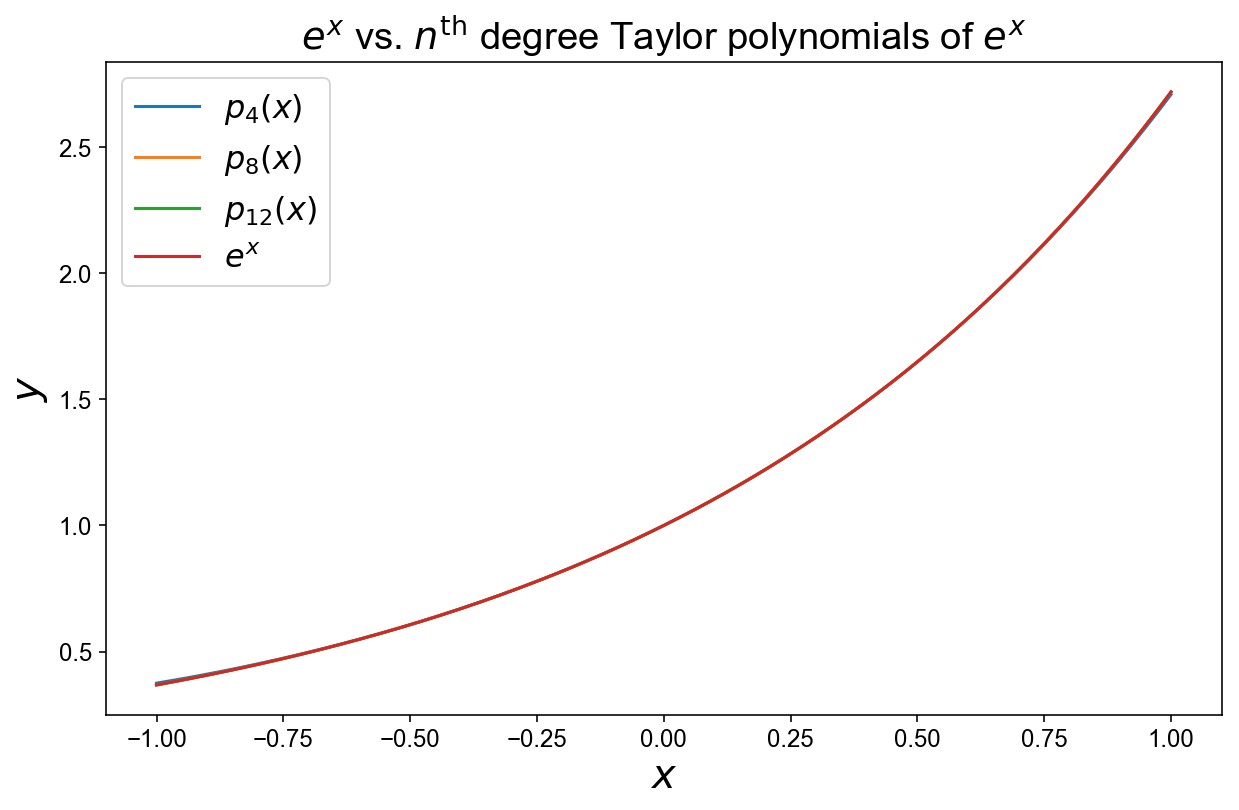

In [18]:
# Plot e^x, p4(x), p8(x) and p12(x) in the same figure window
# with different colors. Add a legend, axis labels and title
# to the plot.

pylab.plot(data['z'], data['p4'],
           data['z'], data['p8'],
           data['z'], data['p12'],
           data['z'], data['f'])

pylab.title('$e^x$ vs. $n^{\mathrm{th}}$ degree Taylor polynomials of $e^x$')
pylab.xlabel('$x$')
pylab.ylabel('$y$')

pylab.legend(('$p_{4}(x)$',
              '$p_{8}(x)$',
              '$p_{12}(x)$',
              '$e^x$'))

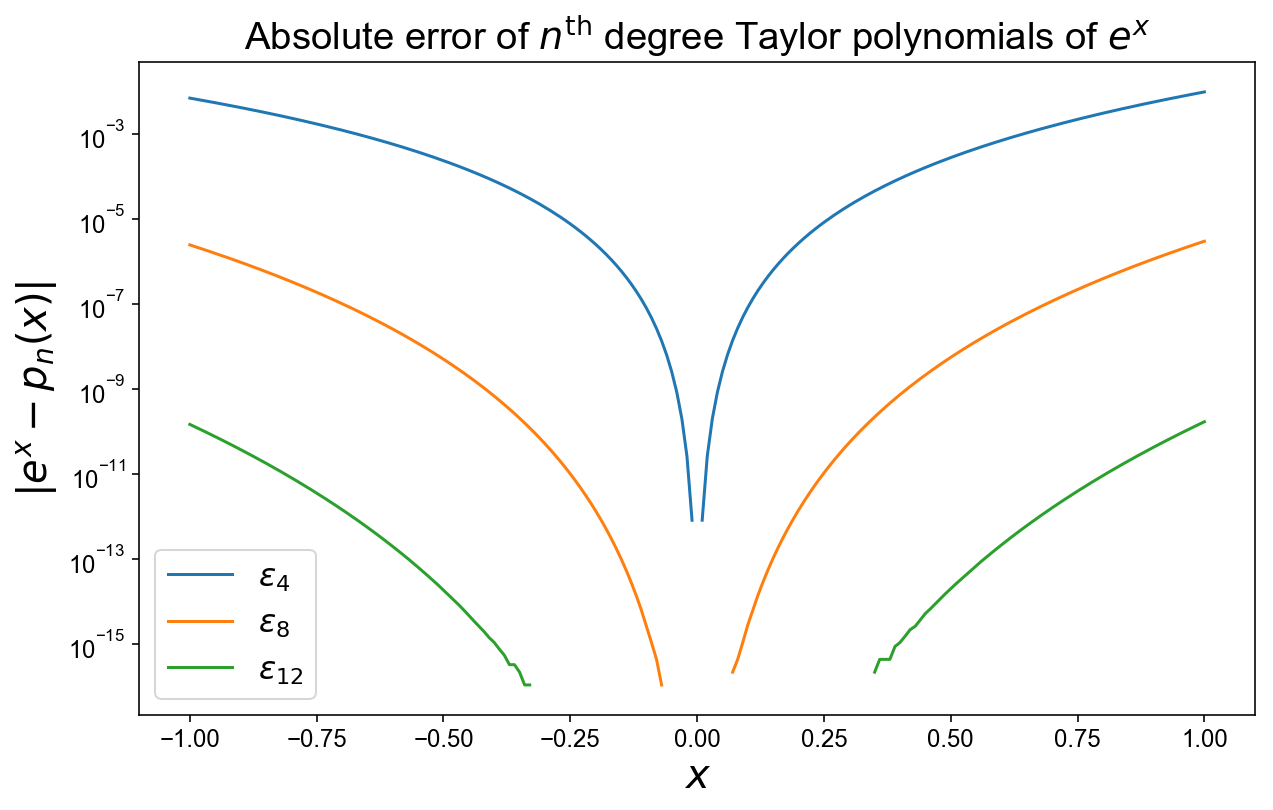

In [25]:
# Plot |e^x − p4(x)|, |e^x − p8(x)| and |e^x − p12(x)|
# in another figure window using the matplotlib command
# semilogy, again with a legend, axis labels and a title.

pylab.semilogy(data['z'], data['err4'],
               data['z'], data['err8'],
               data['z'], data['err12'])

pylab.title('Absolute error of $n^{\mathrm{th}}$ degree Taylor polynomials of $e^x$')
pylab.xlabel('$x$')
pylab.ylabel('$|e^x - p_n(x)|$')

pylab.legend(('$\epsilon_{4}$',
              '$\epsilon_{8}$',
              '$\epsilon_{12}$'))

### Analysis

The plotted results of the error calculations above demonstrate that $p_{12}(1)$ is the better approximation of $e$. As the plot shows, $\epsilon_{12}$ is several orders of magnitude smaller than either $\epsilon_{4}$ or $\epsilon_{8}$ -- less error correlates to a better approximation.


An error term should be greater than the sum of all approximation terms. That said, this can be done by maximizing all of the possible variables:

$$
E_n = \frac{e^\xi}{i!} \leq \frac{e^1}{i!}
$$

The error term $\xi$ is maximized to 1, as that is the maximum value in the given interval $ z = [-1.0,1.0]$. Basically, $\xi \geq \max(z)$.

Then, the degree iterator $i$ is maximized by setting it to $n+1$. The Taylor polynomials only go up to $n$ (where $n \in \{4,8,12\}$). Therefore, $n+1 > n$, and thus maximizing $i$.

$$
E_n = \frac{e^1}{i!} \leq \frac{e^1}{(n+1)!}
$$

In [87]:
import math

E_4 = math.exp(1) / math.factorial(4 + 1)
E_8 = math.exp(1) / math.factorial(8 + 1)
E_12 = math.exp(1) / math.factorial(12 + 1)

print('E_4 = ', E_4)
print('E_8 = ', E_8)
print('E_12 = ', E_12)

E_4 =  0.02265234857049204
E_8 =  7.490856008760596e-06
E_12 =  4.365300704405942e-10


As the results above show, the upper bound calculations are consistent with the error calculations seen in the plot:

$$
E_4 >> E_8 >> E_12
$$

### Conclusion

The results of this program are a good demonstration of the behavior of Taylor polynomials in terms of approximating functions and of the behavior of floating point underflow. As the graphs illustrate, the accuracy of the polynomial approximations increases alongside an increasing degree.

## Part 2 - Errors in a Forward Finite Difference Approximation

This section covers forward difference estimates, which can be used to approximate derivatives.

### Background

#### Forward Finite Difference Estimate

The forward finite difference estimate for $f'(a)$ is defined as

$$
\delta^+ f(a) = \frac{f(a + h) - f(a)}{h}
$$

Where $h$ is the increment.

### Implementation

#### Input Functions

There are three functions needed to perform the forward difference estimate and error calculations: $f(x)$, $f'(x)$, and $f''(x)$. These are:

$$
f(x) = ln(x) \\
f'(x) = \frac{1}{x} \\
f''(x) = - \frac{1}{x^2}
$$

These are implemented as functions `f`, `f1`, and `f2`.

#### Forward Difference Estimate

The forward difference estimate is implemented as a function with two inputs. It implements the following arithmetic:

$$
\delta^+ f(a) = \frac{f(a + h) - f(a)}{h}
$$

This is implemented as the function `forward_difference_estimate`.

#### Error Calculation

The relative error function is implemented as described in the project guidelines:

$$
r = \left| \frac{f'(a) - \delta^+ f(a)}{f'(a)} \right|
$$

This is implemented as the function `relative_error`. The output is saved in `r_e.txt`.

The upper bound of the relative error is likewise implemented as described in the project guidelines:

$$
R = c_1 h + c_2 \frac{1}{h} = \left| \frac{f''(a)}{2f'(a)} \right| h + \left| \frac{f(a)\epsilon_{DP}}{f'(a)} \right| \frac{1}{h}
$$

Accordingly, this is implemented as the function `relative_error_upper_bound`. The output is saved in `r_u.txt`.

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [89]:
names = [ 'n', 'h', 'r_e', 'r_u', ]
data = {name: loadtxt('../res/part2/'+name+'.txt') for name in names}

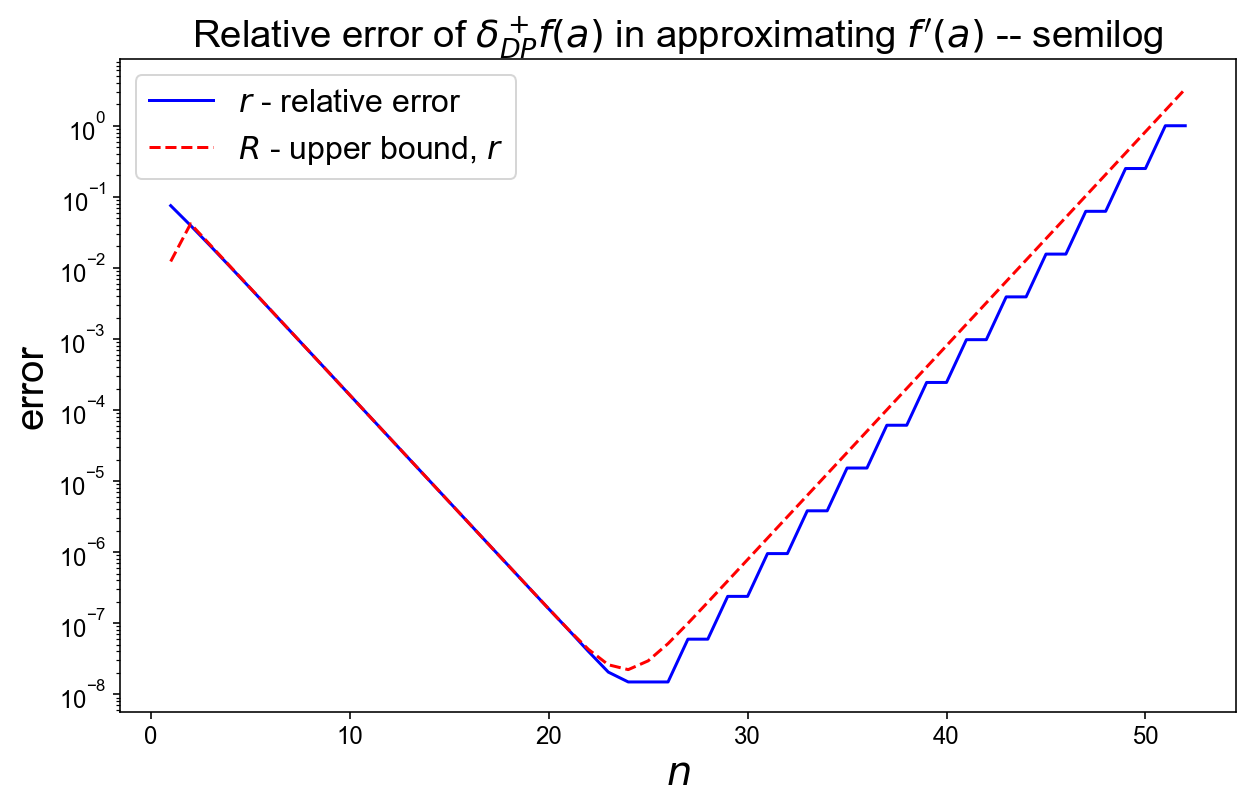

In [73]:
# Create a semilogy plot that overlays r verus n
# with a solid blue line, and R versus n with a
# red dashed line.

pylab.semilogy(data['n'], data['r_e'], '-b')
pylab.semilogy(data['n'], data['r_u'], '--r')

pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ -- semilog')
pylab.xlabel('$n$')
pylab.ylabel('error')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound, $r$'))

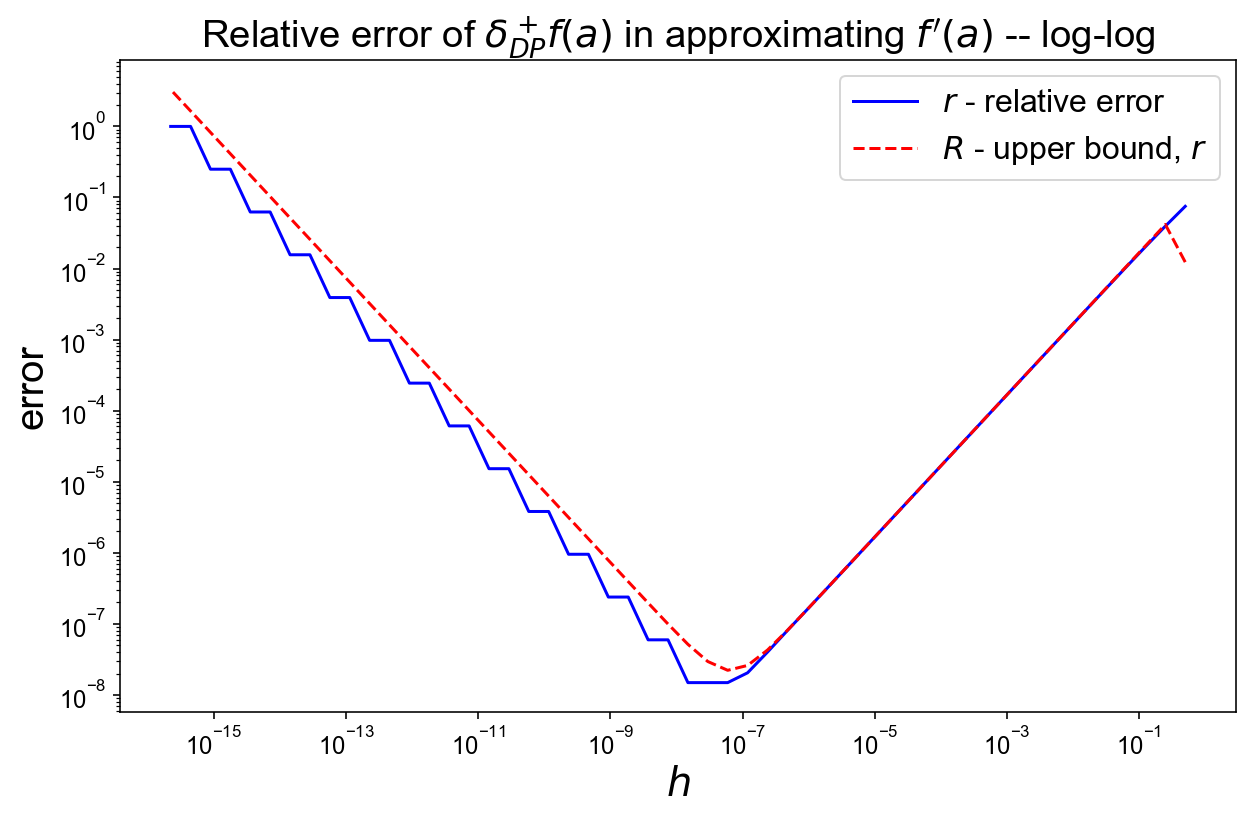

In [93]:
# Create a different loglog plot that overlays
# r verus h with a solid blue line, and R
# versus h with a red dashed line. For both
# plots, add a legend, axis labels and title.

pylab.loglog(data['h'], data['r_e'], '-b')
pylab.loglog(data['h'], data['r_u'], '--r')

pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ -- log-log')
pylab.xlabel('$h$')
pylab.ylabel('error')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound, $r$'))

### Analysis

Both of these graphs show that as $h$ decreases and $n$ increases, the error logarithmically approaches zero. However, after a certain point, the error begins to increase again (roughly around $n = 26, h = 10^{-8}$). At small values of $h$, the limitations in the floating point representation of numbers may introduce error at the evaluation of $h$ itself, the evaluation of $a+h$ relative to $a$, or division by $h$.

### Conclusion

These plots and calculations were a great demonstration of the pitfalls of doing complex arithmetic with floating point numbers, as the error plots show.

## Part 3 - Propagation of Errors

This section covers the propagation of error when evaluating recurrence relations.

### Background

#### Recurrence Relation for a Sequence of Values

The sequence of values $\{V_j\}_{n=0}^{\infty}$ defined by the definite integrals

$$
V_j = \int_{0}^{1} e^{x-1} x^j dx \\
j = 0, 1, 2, \ldots
$$

satisfies the recurrence relation

$$
V_j = 1 - jV_{j-1} \\
j = 1, 2, \ldots
$$

and the inequalities

$$
0 \lt V_{j+1} \lt V_j \lt \frac{1}{j} \\
j = 1, 2, \ldots
$$

This can be show by the following:

$$
V_0 = \int_{0}^{1} e^{x-1} x^j dx\\
\Rightarrow f(x) = x^j , g(x) = e^{x-1} \\
f'(x) = jx^{j-1} , g'(x) = e^{x-1} \\
\Rightarrow x^j e^{x-1} \Big|_0^1 - j \int_{0}^{1} x^{j-1} e^{x-1} dx \\ \\
V_0 = \int_{0}^{1} e^{x-1} x^j dx \\
x^j e^{x-1} \Big|_0^1 = 1 \\
\Rightarrow V_j = 1 - jV_{j-1}
$$

### Implementation

#### Recurrence Relation

There is really only one function being evaluated for this: the recurrence relation

$$
V_j = 1 - jV_{j-1}
$$

This is implemented with the function `recurrence_relation`, which takes as input a new coefficient $j$ and the previously computed value $V_{j-1}$. Of course, the initial input $V_0$ must come from the evaluation of

$$
V_0 = \int_{0}^{1} e^{x-1} x^j dx = 1 - \frac{1}{e}
$$

Naturally, for the calculations involving an added $\epsilon$ value, this initial calculation for $V_0$ is replaced by $V_0 + \epsilon$.

For the non-$\epsilon$ calculations, the outputs are saved in files `j.txt` (the $j$ values), `v.txt` (the $V_j$ values), and `e.txt` (the $\frac{V_j}{j!}$ values). The calculations including $\epsilon$ values share in $j$ values, but output their own `v2_e{1..3}.txt` and `e2_e{1..3}.txt` files.

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [81]:
names = [ 'j', 'v', 'e', 'v2_e1', 'v2_e2', 'v2_e3', 'e2_e1', 'e2_e2', 'e2_e3' ]
data = {name: loadtxt('../res/part3/'+name+'.txt') for name in names}

In [85]:
from IPython.display import (HTML, display)

table = [ data['j'], data['v'], data['e'] ]

table[0] = np.hstack(('j', table[0]))
table[1] = np.hstack(('V_j', table[1]))
table[2] = np.hstack(('V_j / j!', table[2]))

table = zip(*table)

display(HTML('<h3>Initial Calculation, &epsilon; = 0.0<h3>'))
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

j,V_j,V_j / j!
0.0,0.632121,0.632121
1.0,0.367879,0.367879
2.0,0.264241,0.132121
3.0,0.207277,0.0345461
4.0,0.170893,0.00712056
5.0,0.145533,0.00121277
6.0,0.126802,0.000176114
7.0,0.112384,2.22983e-05
8.0,0.100932,2.50327e-06
9.0,0.0916123,2.52459e-07


As the table illustrates, as $j$ increases, $V_j$ approaches and then surpasses 0, that is until $j$ becomes sufficiently large such that $V_j$ starts to alternate between very large and very small quantities. This is likely due to the propagation of error as $V_j$ gets further and further away from its initial state.

In [84]:
from IPython.display import (HTML, display)

table = [ data['j'], data['v2_e1'], data['e2_e1'] ]

table[0] = np.hstack(('j', table[0]))
table[1] = np.hstack(('V_j', table[1]))
table[2] = np.hstack(('| V_j / j! |', table[2]))

table = zip(*table)

display(HTML('<h3>Second Calculation, &epsilon; = 0.13<h3>'))
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

j,V_j,| V_j / j! |
0.0,0.762121,0.762121
1.0,0.237879,0.237879
2.0,0.524241,0.262121
3.0,-0.572723,0.0954539
4.0,3.29089,0.137121
5.0,-15.4545,0.128787
6.0,93.7268,0.130176
7.0,-655.088,0.129978
8.0,5241.7,0.130003
9.0,-47174.3,0.13


In [83]:
from IPython.display import (HTML, display)

table = [ data['j'], data['v2_e2'], data['e2_e2'] ]

table[0] = np.hstack(('j', table[0]))
table[1] = np.hstack(('V_j', table[1]))
table[2] = np.hstack(('| V_j / j! |', table[2]))

table = zip(*table)

display(HTML('<h3>Third Calculation, &epsilon; = 0.0024<h3>'))
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

j,V_j,| V_j / j! |
0.0,0.634521,0.634521
1.0,0.365479,0.365479
2.0,0.269041,0.134521
3.0,0.192877,0.0321461
4.0,0.228493,0.00952056
5.0,-0.142467,0.00118723
6.0,1.8548,0.00257611
7.0,-11.9836,0.0023777
8.0,96.8689,0.0024025
9.0,-870.82,0.00239975


In [82]:
from IPython.display import (HTML, display)

table = [ data['j'], data['v2_e3'], data['e2_e3'] ]

table[0] = np.hstack(('j', table[0]))
table[1] = np.hstack(('V_j', table[1]))
table[2] = np.hstack(('| V_j / j! |', table[2]))

table = zip(*table)

display(HTML('<h3>Final Calculation, &epsilon; = 0.000035<h3>'))
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

j,V_j,| V_j / j! |
0.0,0.632156,0.632156
1.0,0.367844,0.367844
2.0,0.264311,0.132156
3.0,0.207067,0.0345111
4.0,0.171733,0.00715556
5.0,0.141333,0.00117777
6.0,0.152002,0.000211114
7.0,-0.0640165,1.27017e-05
8.0,1.51213,3.75033e-05
9.0,-12.6092,3.47475e-05


For each of the calculations involving an $\epsilon$ value, $\lvert \frac{V_j}{j!} \rvert$ approaches that $\epsilon$ value as $j$ increases (until $j$ becomes sufficiently large, of course).

#### Derivation of Recurrence Relation

$\hat{V_j} = V_j + (-1)^j j! \epsilon$

$\frac{\hat{V_j}}{j!} = \frac{V_j}{j!} + (-1)^j \epsilon$

$\approx (-1)^j \epsilon$

### Conclusion

This is yet another example of how error propagates throughout arithmetic computations due to the limitations of floating point number representations, but this is especially apparent in this section due to the sheer scale of the error.